# https://gymnasium.farama.org/environments/toy_text/cliff_walking/

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('CliffWalking-v0')


In [2]:
class Sarsa:
    def __init__(self,ncol,nrow,epsilon,alpha,gamma,n_action=4) -> None:
        self.Q_table = np.zeros((nrow*ncol,n_action)) # 上右下左
        self.epsilon = epsilon
        self.alpha = alpha 
        self.gamma = gamma
        self.n_action = n_action
    def take_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    def update(self,s0,a0,r,s1,a1):
        td_error = r + self.gamma * self.Q_table[s1][a1] - self.Q_table[s0,a0]
        self.Q_table[s0][a0] += td_error * self.alpha     

In [ ]:
ncol,nrow,epsilon,alpha,gamma,num_episodes,eposide = 12,4,0.1,.1,.1,500,0
#np.random.seed(0)
agent = Sarsa(ncol,nrow,epsilon,alpha,gamma)
return_list = []  #记录每一条序列的回报
while eposide < num_episodes:
    done = False
    epsilon_return = 0
    s = env.reset()[0]
    a = agent.take_action(s)
    while not done:
        s1,r,done,truncated,_ = env.step(a)
        a1 = agent.take_action(s1)
        agent.update(s,a,r,s1,a1)
        s = s1
        a = a1
        epsilon_return+=r
        if done:
            print(f'{eposide}:{epsilon_return}')
        #env.render()
    return_list.append(epsilon_return)
    eposide+=1

#打印Q表格
direct = {
    0:'^',
    1:'>',
    2:'v',
    3:'<'
}
for i in range(nrow):
    for j in range(ncol):
        index = np.argmax(agent.Q_table[ncol*i+j])
        print(direct[index],end=' ')
    print()

#绘图
plt.plot(range(0,eposide),return_list)
plt.show()
np.save(f'Q_table_{num_episodes}',agent.Q_table)

In [10]:
class Nstep_Sarsa(Sarsa):
    def __init__(self, ncol, nrow, epsilon, alpha, gamma,n, n_action=4) -> None:
        super().__init__(ncol, nrow, epsilon, alpha, gamma, n_action)
        self.n = n
        self.state_list = []
        self.action_list = []
        self.reward_list = []
    
    def update(self, s0, a0, r, s1, a1,done):
        self.state_list.append(s0)
        self.action_list.append(a0)
        self.reward_list.append(r)
        if len(self.state_list) == self.n:
            G = self.Q_table[s1,a1]
            for i in reversed(range(self.n)):
                G = self.gamma * G + self.reward_list[i]
                if done and i>0:
                    s = self.state_list[i]
                    a = self.action_list[i]
                    self.Q_table[s,a] += self.alpha *(G-self.Q_table[s,a])
            s = self.state_list.pop(0)
            a = self.action_list.pop(0)
            self.reward_list.pop(0)
            self.Q_table[s, a] += self.alpha * (G - self.Q_table[s, a])
            if done:
                self.state_list = []
                self.action_list = []
                self.reward_list = []




0:-230
1:-8140
2:-799
3:-249
4:-739
5:-970
6:-709
7:-11839
8:-10741
9:-190
10:-231
11:-266
12:-251
13:-1411
14:-1265
15:-974
16:-252
17:-178
18:-592
19:-1750
20:-409
21:-17889
22:-3586
23:-13840
24:-197
25:-548
26:-350
27:-1982
28:-1171
29:-2208
30:-111
31:-224
32:-216
33:-134
34:-177
35:-775
36:-364
37:-74
38:-101
39:-47
40:-912
41:-953
42:-273
43:-2223
44:-2294
45:-3452
46:-2816
47:-1988
48:-259
49:-2919
50:-8813
51:-131
52:-395
53:-138
54:-585
55:-54
56:-1457
57:-39
58:-164
59:-119
60:-772
61:-471
62:-87
63:-6826
64:-1763
65:-3636
66:-639
67:-40
68:-3009
69:-212
70:-1113
71:-568
72:-341
73:-1225
74:-2876
75:-950
76:-3202
77:-1157
78:-2727
79:-528
80:-21
81:-21
82:-168
83:-131
84:-143
85:-1621
86:-831
87:-661
88:-3058
89:-111
90:-237
91:-222
92:-21
93:-24
94:-26
95:-81
96:-63
97:-51
98:-63
99:-125
100:-87
101:-39
102:-67
103:-18
104:-131
105:-34
106:-196
107:-732
108:-447
109:-402
110:-164
111:-160
112:-66
113:-87
114:-164
115:-214
116:-85
117:-140
118:-154
119:-121
120:-101
121:-143

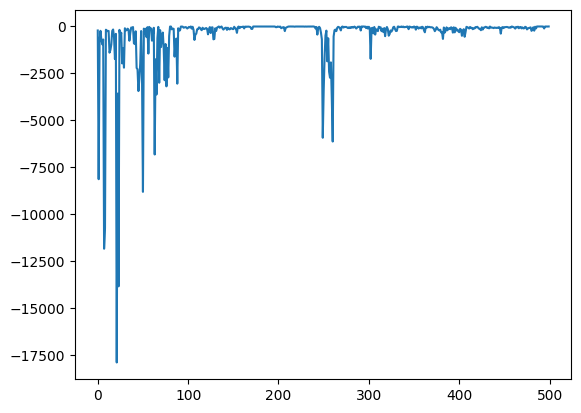

In [11]:
ncol,nrow,epsilon,alpha,gamma,num_episodes,eposide,n_step = 12,4,0.1,.1,.1,500,0,5
#np.random.seed(0)
agent = Nstep_Sarsa(ncol,nrow,epsilon,alpha,gamma,n_step)
return_list = []  #记录每一条序列的回报
while eposide < num_episodes:
    done = False
    epsilon_return = 0
    s = env.reset()[0]
    a = agent.take_action(s)
    while not done:
        s1,r,done,truncated,_ = env.step(a)
        a1 = agent.take_action(s1)
        agent.update(s,a,r,s1,a1,done)
        s = s1
        a = a1
        epsilon_return+=r
        if done:
            print(f'{eposide}:{epsilon_return}')
        #env.render()
    return_list.append(epsilon_return)
    eposide+=1

#打印Q表格
direct = {
    0:'^',
    1:'>',
    2:'v',
    3:'<'
}
for i in range(nrow):
    for j in range(ncol):
        index = np.argmax(agent.Q_table[ncol*i+j])
        print(direct[index],end=' ')
    print()

#绘图
plt.plot(range(0,eposide),return_list)
plt.show()
np.save(f'Q_table_{num_episodes}',agent.Q_table)

In [2]:
class Qlearning:
    """Q-learning算法"""
    def __init__(self,ncol,nrow,epsilon,alpha,gamma,n_action=4) -> None:
        self.Q_table = np.zeros([nrow*ncol,n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    def take_action(self,state):
        if np.random.random()<self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    def update(self,s0,a0,r,s1):
        td_error = r+self.gamma*self.Q_table[s1].max()-self.Q_table[s0,a0]
        self.Q_table[s0,a0] += self.alpha * td_error


0:-80
1:-3452
2:-334
3:-513
4:-1078
5:-1050
6:-1592
7:-856
8:-473
9:-796
10:-592
11:-210
12:-991
13:-958
14:-889
15:-181
16:-688
17:-293
18:-243
19:-556
20:-371
21:-276
22:-198
23:-428
24:-648
25:-699
26:-141
27:-107
28:-280
29:-126
30:-751
31:-540
32:-403
33:-75
34:-672
35:-238
36:-498
37:-116
38:-198
39:-353
40:-772
41:-530
42:-122
43:-808
44:-117
45:-82
46:-356
47:-335
48:-276
49:-29
50:-160
51:-104
52:-110
53:-98
54:-56
55:-405
56:-81
57:-524
58:-164
59:-328
60:-408
61:-84
62:-101
63:-727
64:-36
65:-112
66:-232
67:-185
68:-95
69:-546
70:-194
71:-212
72:-42
73:-94
74:-87
75:-73
76:-42
77:-97
78:-47
79:-455
80:-71
81:-61
82:-63
83:-84
84:-88
85:-41
86:-182
87:-70
88:-54
89:-275
90:-31
91:-37
92:-74
93:-364
94:-147
95:-63
96:-38
97:-79
98:-371
99:-46
100:-50
101:-54
102:-75
103:-339
104:-68
105:-185
106:-28
107:-79
108:-31
109:-339
110:-27
111:-54
112:-161
113:-26
114:-112
115:-465
116:-270
117:-58
118:-145
119:-252
120:-15
121:-37
122:-69
123:-180
124:-213
125:-42
126:-50
127:-161
12

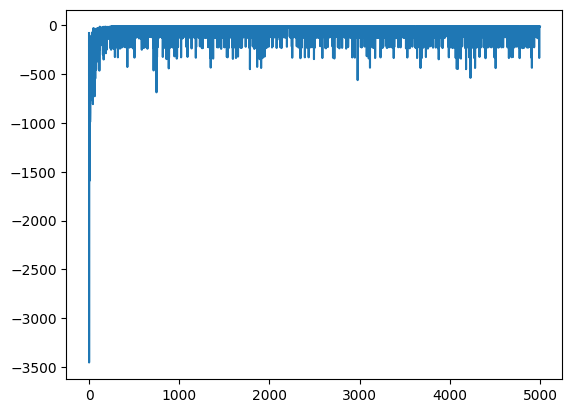

In [4]:
ncol,nrow,epsilon,alpha,gamma,num_episodes,eposide = 12,4,0.1,.1,.1,5000,0
#np.random.seed(0)
agent = Qlearning(ncol,nrow,epsilon,alpha,gamma)
return_list = []  #记录每一条序列的回报
while eposide < num_episodes:
    done = False
    epsilon_return = 0
    s = env.reset()[0]
    while not done:
        a = agent.take_action(s)
        s1,r,done,truncated,_ = env.step(a)
        agent.update(s,a,r,s1)
        s = s1
        epsilon_return+=r
        if done:
            print(f'{eposide}:{epsilon_return}')
        #env.render()
    return_list.append(epsilon_return)
    eposide+=1

#打印Q表格
direct = {
    0:'^',
    1:'>',
    2:'v',
    3:'<'
}
for i in range(nrow):
    for j in range(ncol):
        index = np.argmax(agent.Q_table[ncol*i+j])
        print(direct[index],end=' ')
    print()

#绘图
plt.plot(range(0,eposide),return_list)
plt.show()
np.save(f'Q_table_{num_episodes}',agent.Q_table)

In [ ]:
# 使用训练好的策略游戏
env1 = gym.make('CliffWalking-v0',render_mode="human")
s = env1.reset()[0]
done = False
q_table = np.load("Q_table_5000")
while done:
    a = np.argmax(q_table[s])
    s1,r,done,truncated,info = env1.step(a)
    s = s1
    env1.render()
